In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [3]:
class LogisticRegression:
    def __init__(self, lr = 0.01, num_iter = 10000, fit_intercept = True, verbose = False):
        self.lr = lr
        self.num_inter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis = 1)
    
    def __sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    
    def __loss(self, h, y):
        return(-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if(self.fit_intercept):
            X = self.__add_intercept(X)
            
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_inter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
                
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
            
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [4]:
import numpy as np

class SoftmaxRegression:
    def __init__(self, K, lr=0.01, num_iter=10000):
        self.lr = lr
        self.num_inter = num_iter
        self.K = K

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def __softmax(self, z):
        z -= np.max(z)
        return np.exp(z) / np.sum(np.exp(z), axis=1)

    def __h(self, X, y):
        return self.__softmax(X @ self.theta)

    def __J(self, preds, y, m):
        return np.sum(- np.log(preds[np.arange(m), y]))

    def __T(self, y, K):
        # one hot encoding
        one_hot = np.zeros((len(y), K))
        one_hot[np.arange(len(y)), y] = 1
        return one_hot

    def __compute_gradient(self, theta, X, y, m):
        preds = self.__h(X, theta)
        gradient = 1 / m * X.T @ (preds - self.__T(y, self.K))
        return gradient

    def fit(self, X, y):
        hist = {'loss': [], 'acc': []}
        m, n = X.shape

        for i in range(self.__num.iter):
            gradient = self.__compute_gradient(self.theta, X, y, m)
            self.theta -= self.lr * gradient

            # loss
            preds = self.__h(X, self.theta)
            loss = self.__J(preds, y, m)

            c = 0
            for j in range(len(y)):
                if np.argmax(self.__h(X[j], self.theta)) == y[j]:
                    c += 1
                acc = c / len(y)
                hist['acc'].append(acc)
            # print stats
            if i % 200 == 0: print('{:.2f} {:.2f}%', format(loss, acc * 100))

In [28]:
import sklearn.datasets

iris = sklearn.datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

print(X.shape, y.shape)
print(iris)

(150, 2) (150,)
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 

In [6]:
print(X, y)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

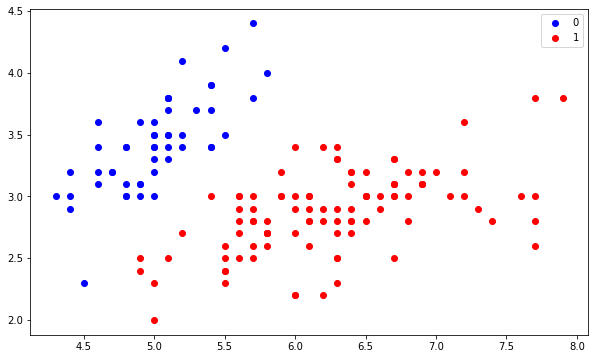

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

In [8]:
model = LogisticRegression(lr=0.1, num_iter=300000)

In [30]:
X_train, X_test, y_train, y_test = X[:100], X[100:], y[:100], y[100:]
print(X_train.shape, y_train.shape)

(100, 2) (100,)


In [31]:
%time model.fit(X_train, y_train)

Wall time: 4.56 s


In [37]:
from sklearn.model_selection import StratifiedKFold

skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train):
    #clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train[test_index]
    model.fit(X_train_folds, y_train_folds)
    y_pred = model.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) 

1.0
1.0
0.9696969696969697


In [47]:
from sklearn.model_selection import StratifiedKFold

skfolds = StratifiedKFold(n_splits=3)
ret = []
for train_index, test_index in skfolds.split(X_train, y_train):
    #clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train[test_index]
    model.fit(X_train_folds, y_train_folds)
    y_pred = model.predict(X_test_fold)
    print(len(y_pred))
    ret.extend(y_pred)

34
33
33


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, ret)

array([[33, 17],
       [16, 34]], dtype=int64)

In [50]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, ret)

0.6666666666666666

In [51]:
recall_score(y_train, ret)

0.68

In [54]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, ret)

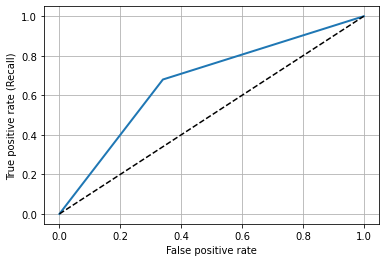

In [55]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis("on")
    plt.grid()
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate (Recall)")
    
plot_roc_curve(fpr, tpr)
plt.show()

In [57]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, ret)

0.67

In [53]:
preds = model.predict(X_test)
(preds == y_test).mean()

1.0

In [12]:
model.theta

array([-25.89066442,  12.523156  , -13.40150447])

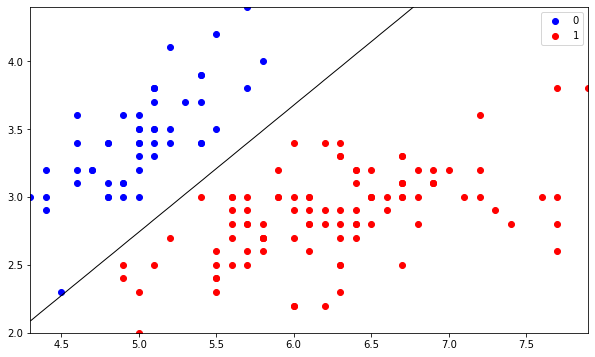

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');